In [1]:
import pandas as pd

C:\Users\hp\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("Data.csv")
df

HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0               No  24.56     Yes              No     No              20   
1               No  30.23      No              No     No               0   
2               No  29.12     Yes              No     No               0   
3              Yes  30.23      No              No     No               0   
4               No  20.81     Yes              No    Yes               0   
...            ...    ...     ...             ...    ...             ...   
59063          Yes  21.93     Yes              No     No              20   
59064           No  24.68     Yes              No     No               0   
59065          Yes  20.38      No              No     No               5   
59066           No  25.86     Yes              No     No              30   
59067          Yes  26.50      No              No     No               0   

       MentalHealth DiffWalking     Sex  AgeCategory      Race Diabetic  \
0              15.0          No  Female        50-54  Hispanic       No   
1               0.0          No  Female        75-79     White       No   
2               0.0          No  Female  80 or older     White       No   
3               0.0          No  Female  80 or older     White       No   
4               0.0          No    Male        65-69     White       No   
...             ...         ...     ...          ...       ...      ...   
59063           0.0          No  Female        70-74     White      Yes   
59064           0.0         Yes    Male  80 or older     White       No   
59065           4.0          No  Female        65-69     White       No   
59066           0.0         Yes    Male        65-69     White       No   
59067           0.0          No  Female        65-69     White       No   

      PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0                  Yes       Good          6     No            No         No  
1                  Yes  Excellent          7     No            No         No  
2                  Yes  Excellent          7    Yes            No         No  
3                  Yes  Very good          8     No            No         No  
4                  Yes       Fair          8     No            No         No  
...                ...        ...        ...    ...           ...        ...  
59063              Yes       Fair          4    Yes            No        Yes  
59064              Yes  Very good          6     No            No        Yes  
59065              Yes       Good          7     No            No         No  
59066               No       Good          7     No            No        Yes  
59067               No  Very good          7     No            No         No  

[59068 rows x 18 columns]

In [9]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'BMI_PhysicalHealth',
       'BMI_Rounded', 'PhysicalHealth_Rounded'],
      dtype='object')

In [10]:
df.dtypes

HeartDisease               object
BMI                       float64
Smoking                    object
AlcoholDrinking            object
Stroke                     object
PhysicalHealth              int64
MentalHealth              float64
DiffWalking                object
Sex                        object
AgeCategory                object
Race                       object
Diabetic                   object
PhysicalActivity           object
GenHealth                  object
SleepTime                   int64
Asthma                     object
KidneyDisease              object
SkinCancer                 object
BMI_PhysicalHealth        float64
BMI_Rounded               float64
PhysicalHealth_Rounded      int64
dtype: object

In [11]:
only_ints = df.select_dtypes(include=['int'])
only_ints

PhysicalHealth  SleepTime  PhysicalHealth_Rounded
0                  20          6                      20
1                   0          7                       0
2                   0          7                       0
3                   0          8                       0
4                   0          8                       0
...               ...        ...                     ...
59063              20          4                      20
59064               0          6                       0
59065               5          7                       5
59066              30          7                      30
59067               0          7                       0

[59068 rows x 3 columns]

In [12]:
print(only_ints.columns)

Index(['PhysicalHealth', 'SleepTime', 'PhysicalHealth_Rounded'], dtype='object')


In [3]:
df['BMI_PhysicalHealth'] = df['BMI'] * df['PhysicalHealth']
df['BMI_PhysicalHealth']

0        491.2
1          0.0
2          0.0
3          0.0
4          0.0
         ...  
59063    438.6
59064      0.0
59065    101.9
59066    775.8
59067      0.0
Name: BMI_PhysicalHealth, Length: 59068, dtype: float64

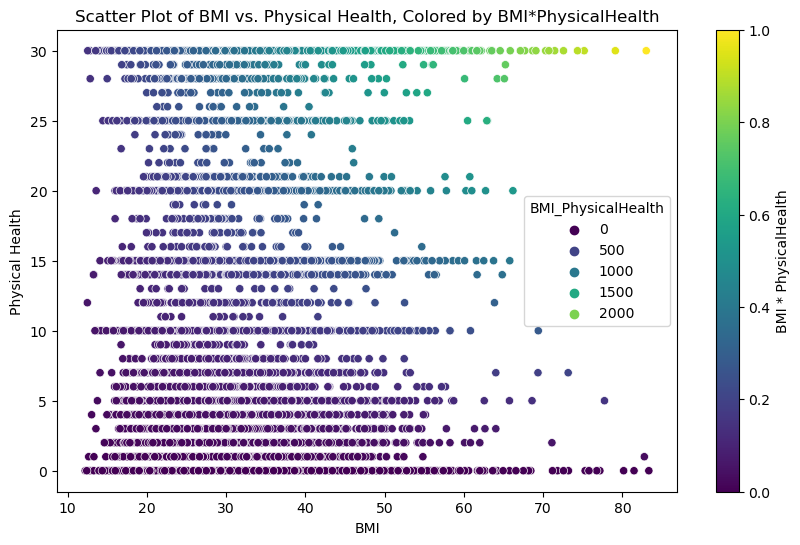

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    x='BMI',
    y='PhysicalHealth',
    hue='BMI_PhysicalHealth',
    palette='viridis',
    data=df
)
scatter.set(title='Scatter Plot of BMI vs. Physical Health, Colored by BMI*PhysicalHealth', xlabel='BMI', ylabel='Physical Health')
plt.colorbar(scatter.collections[0], label='BMI * PhysicalHealth')
plt.show()


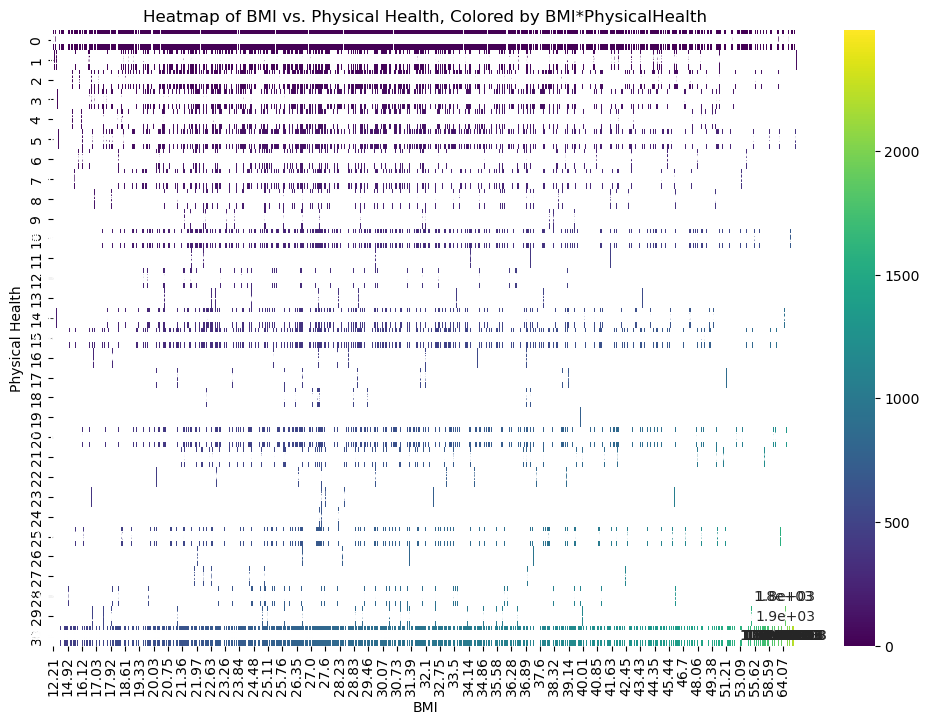

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a pivot table for the heatmap
pivot_table = df.pivot_table(values='BMI_PhysicalHealth', index='PhysicalHealth', columns='BMI')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis', annot=True)
plt.title('Heatmap of BMI vs. Physical Health, Colored by BMI*PhysicalHealth')
plt.xlabel('BMI')
plt.ylabel('Physical Health')
plt.show()


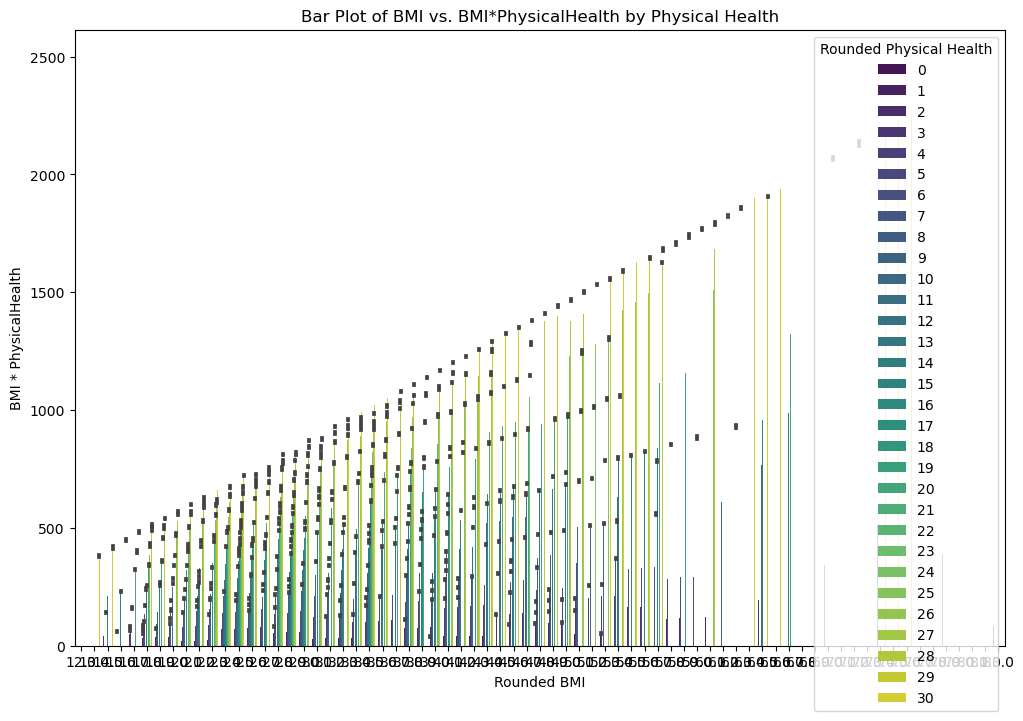

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# For simplicity, we'll round BMI and PhysicalHealth to create categories
df['BMI_Rounded'] = df['BMI'].round()
df['PhysicalHealth_Rounded'] = df['PhysicalHealth'].round()

plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(
    x='BMI_Rounded',
    y='BMI_PhysicalHealth',
    hue='PhysicalHealth_Rounded',
    data=df,
    palette='viridis'
)
bar_plot.set(title='Bar Plot of BMI vs. BMI*PhysicalHealth by Physical Health', xlabel='Rounded BMI', ylabel='BMI * PhysicalHealth')
plt.legend(title='Rounded Physical Health', loc='upper right')
plt.show()


In [4]:
df['AlcoholSmoking'] = df['AlcoholDrinking'] * df['Smoking']
df['AlcoholSmoking'] 

TypeError: can't multiply sequence by non-int of type 'str'